In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv("USA_Housing.csv")
df.sample(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
3359,69874.813423,5.975927,6.292953,4.40,27987.416154,1.114958e+06,"9273 Lee Key Apt. 976\nAmandaport, GU 80917"
4115,70933.398805,5.335397,6.005656,3.16,40092.336158,1.088635e+06,"167 Anderson Hill\nNew Charleshaven, MA 94790"
1476,60762.465663,4.768989,8.298090,3.05,46303.364595,1.069238e+06,"35040 Mark Via\nWest Stacey, FL 16909"
4795,70276.296327,6.045552,6.853549,3.09,34846.047205,1.342998e+06,"93689 Montgomery Prairie Apt. 432\nWolfebury, ..."
3432,76156.468161,7.575082,6.404836,3.10,34493.804459,1.521746e+06,"3817 Mark Shore Suite 626\nRebeccaside, CO 34052"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [10]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

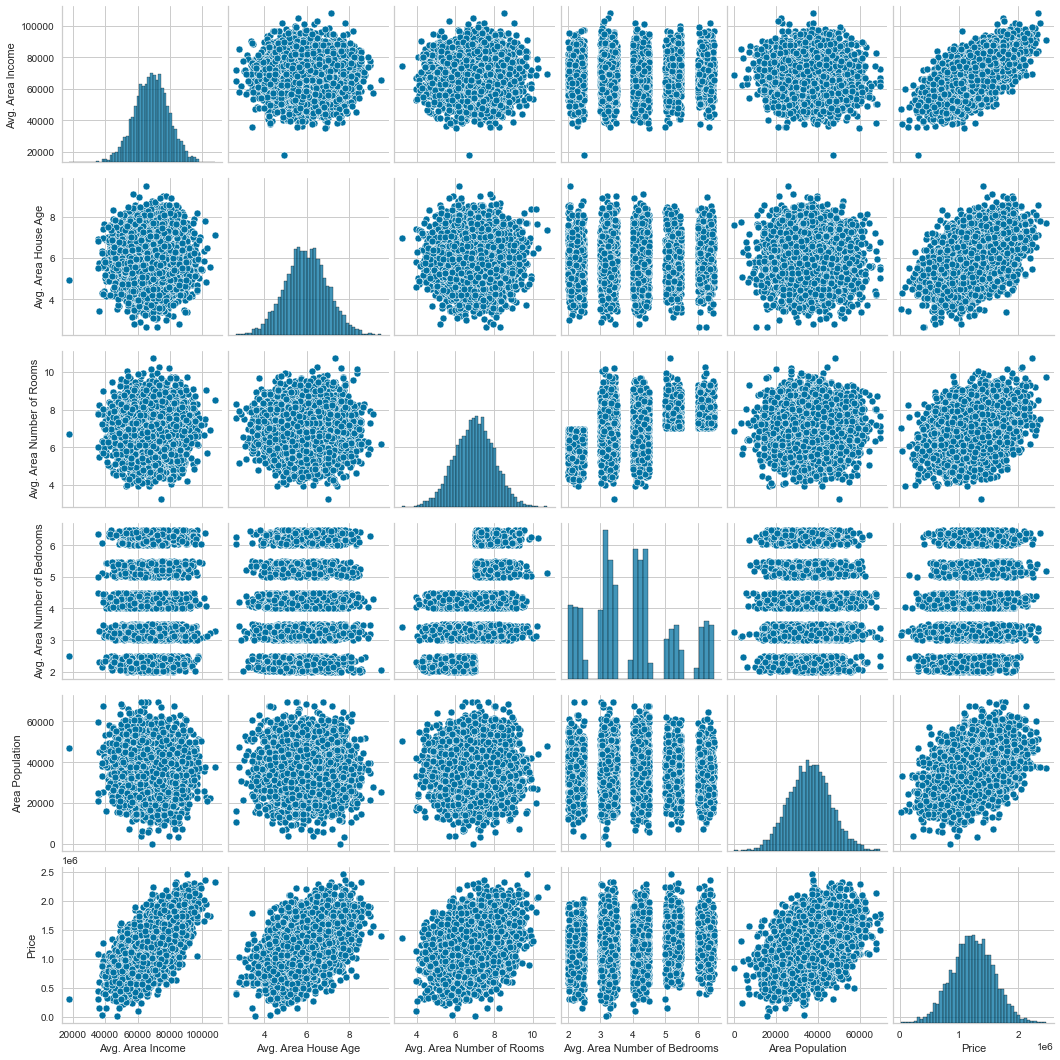

In [11]:
sns.pairplot(df);

In [12]:
## pairplot ------> çift yönlü inceleme.

In [13]:
## mesela insanların geliri arttıkça daha pahalı evde oturuyorlar.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


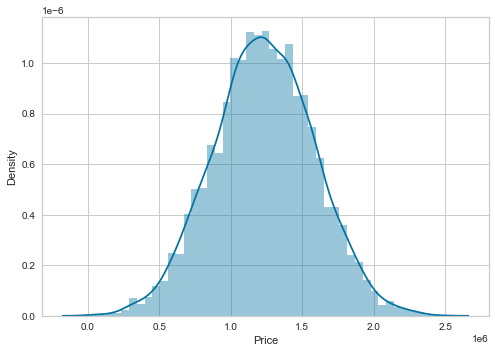

In [14]:
sns.distplot(df["Price"]);

In [15]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


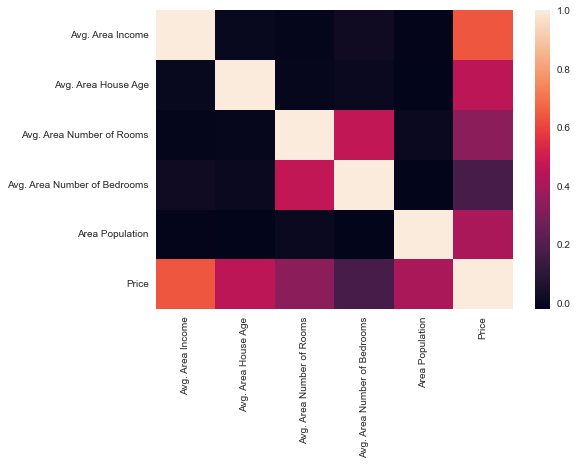

In [16]:
sns.heatmap(df.corr());

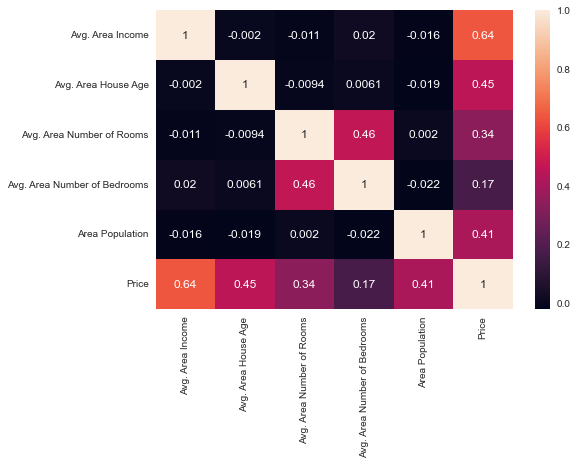

In [17]:
sns.heatmap(df.corr(),annot=True);

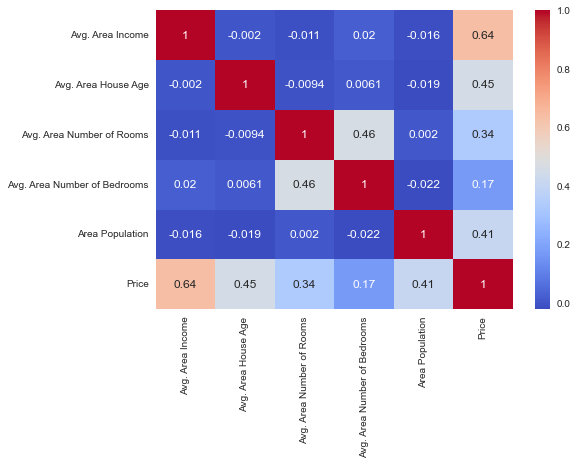

In [18]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm");

### Training a linear regression model

In [19]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [20]:
## address' sayısal bir veri değil zaten anlamlı da değil burada .

In [21]:
X = df.drop(["Price","Address"],axis=1)
y = df["Price"] #------> target

In [22]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [23]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2)                    
# standart ayırma 0.8 e 0.20

In [26]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2154,68785.203312,7.005534,6.599608,4.03,48564.798543
4667,71254.799565,6.541421,7.575107,5.43,38916.451162
1472,82103.499338,6.650747,7.343428,6.19,49015.284649
2611,68776.666704,6.105566,7.492700,4.43,37986.701790
1099,76048.372319,6.642757,7.658409,6.43,22469.522532
...,...,...,...,...,...
856,44247.149037,6.453833,6.166052,4.38,22011.945934
2224,63143.622709,6.112444,7.306289,6.43,33577.509513
2923,61657.043538,7.519087,7.926372,4.00,42285.962804
4189,84657.623643,8.125142,7.456779,5.17,37068.486757


## random_state 'in defaultu None'dır ve bunu None'da bırakırsak eğer  her çalıştırdığımızda bizim train data setimiz vs hepsi değişir peki bunun önüne nasıl geçeriz ? : 

In [27]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2,random_state=42)      

In [28]:
X_train                        ## random_state'i seçerek random'ı 1 sefer uygulatıyoruz.

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4227,66547.016454,5.846095,6.847298,4.13,27850.822901
4676,53722.008599,6.401391,7.787764,3.30,47649.224665
800,64838.492899,6.437157,8.699544,4.02,32921.010068
3671,67097.092120,6.086754,7.211963,3.05,27191.506877
4193,75245.465436,8.167820,7.420100,3.42,37410.669928
...,...,...,...,...,...
4426,76223.561256,6.371627,5.342217,2.42,30165.337445
466,56685.014442,6.958045,7.502115,3.38,43322.166854
3092,66195.337714,6.507971,6.611861,3.14,37288.923574
3772,58694.515017,7.394768,9.269453,4.32,49960.977236


### Training Model

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()   ## artık fit edeceğiz : 

In [31]:
model.fit(X_train,y_train) 

LinearRegression()

In [32]:
# model.score(X,y)*100  

### Model Evaluate

In [33]:
model.intercept_                         # X = 0 olursa benim modelim bu değeri tahmin edecek .

-2635072.900932409

## bizim featurelarımızın price olan etkisi :

In [34]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [35]:
model.coef_

array([2.16522058e+01, 1.64666481e+05, 1.19624012e+05, 2.44037761e+03,
       1.52703134e+01])

In [36]:
coeff_df = pd.DataFrame(data=model.coef_ ,index=X.columns,columns=["Coefficient"])
coeff_df

,Coefficient
Avg. Area Income,21.652206
Avg. Area House Age,164666.480722
Avg. Area Number of Rooms,119624.012232
Avg. Area Number of Bedrooms,2440.377611
Area Population,15.270313


In [37]:
### model.coef_ bize neyi ifade ediyor -----> bunlardaki 1 birimlik değişiklikler price'ı ne ölçüde etkiliyor.

### Prediction

In [38]:
predictions = model.predict(X_test)
predictions

array([1308587.92699739, 1237037.22949415, 1243429.34030699,
       1228900.21360399, 1063320.90710796, 1544058.05034843,
       1094774.70493025,  833284.72339235,  788412.85578734,
       1469714.86615704,  671728.43662075, 1606818.21977877,
       1004166.61331055, 1796798.97595942, 1288566.96220993,
       1087782.9330108 , 1423072.37492513, 1078178.68169664,
        802286.03537907,  930761.03695723, 1134829.86477813,
        916398.42023117, 1489972.69335398, 1284580.15538827,
       1582071.35322715, 1132519.15991996, 1089888.39644504,
        974510.51872165,  924057.96820717, 1740759.72092251,
       1286481.59512341, 1621289.95171613, 1435264.20161709,
       1234014.779245  , 1485434.57300369, 1718335.00753655,
       1538953.74882816,  777106.64791807, 1765201.5224361 ,
       1175972.14199824, 1553707.94323483,  897703.67505173,
       1371049.80326605,  845281.72310356, 1201022.89803874,
       1133285.98450833, 1363128.14557367, 1449814.08768251,
       1574363.90467342,

In [39]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1501,61907.593345,7.017838,6.440256,3.25,43828.947207
2586,57160.202243,6.893260,6.921532,3.13,43467.147035
2653,70190.796445,6.745054,6.662567,2.01,29215.136112
1055,69316.796889,6.300409,7.873576,4.28,24448.211461
705,72991.481649,3.412866,6.494081,2.48,50626.495426
...,...,...,...,...,...
4711,77267.656264,3.939501,8.342808,6.09,22487.712072
2313,75967.135085,5.939370,6.111658,2.32,38897.091584
3214,81013.615294,7.149797,7.239105,5.44,45472.049451
2732,86762.882864,6.530193,5.106962,2.09,47724.581355


In [40]:
X_test["predictions"] = predictions

In [41]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,predictions
1501,61907.593345,7.017838,6.440256,3.25,43828.947207,1.308588e+06
2586,57160.202243,6.893260,6.921532,3.13,43467.147035,1.237037e+06
2653,70190.796445,6.745054,6.662567,2.01,29215.136112,1.243429e+06
1055,69316.796889,6.300409,7.873576,4.28,24448.211461,1.228900e+06
705,72991.481649,3.412866,6.494081,2.48,50626.495426,1.063321e+06
...,...,...,...,...,...,...
4711,77267.656264,3.939501,8.342808,6.09,22487.712072,1.042903e+06
2313,75967.135085,5.939370,6.111658,2.32,38897.091584,1.318532e+06
3214,81013.615294,7.149797,7.239105,5.44,45472.049451,1.870001e+06
2732,86762.882864,6.530193,5.106962,2.09,47724.581355,1.663624e+06


In [42]:
y_test

1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
            ...     
4711    1.107031e+06
2313    1.405505e+06
3214    1.924156e+06
2732    1.571254e+06
1926    8.831475e+05
Name: Price, Length: 1000, dtype: float64

In [43]:
predictions

array([1308587.92699739, 1237037.22949415, 1243429.34030699,
       1228900.21360399, 1063320.90710796, 1544058.05034843,
       1094774.70493025,  833284.72339235,  788412.85578734,
       1469714.86615704,  671728.43662075, 1606818.21977877,
       1004166.61331055, 1796798.97595942, 1288566.96220993,
       1087782.9330108 , 1423072.37492513, 1078178.68169664,
        802286.03537907,  930761.03695723, 1134829.86477813,
        916398.42023117, 1489972.69335398, 1284580.15538827,
       1582071.35322715, 1132519.15991996, 1089888.39644504,
        974510.51872165,  924057.96820717, 1740759.72092251,
       1286481.59512341, 1621289.95171613, 1435264.20161709,
       1234014.779245  , 1485434.57300369, 1718335.00753655,
       1538953.74882816,  777106.64791807, 1765201.5224361 ,
       1175972.14199824, 1553707.94323483,  897703.67505173,
       1371049.80326605,  845281.72310356, 1201022.89803874,
       1133285.98450833, 1363128.14557367, 1449814.08768251,
       1574363.90467342,

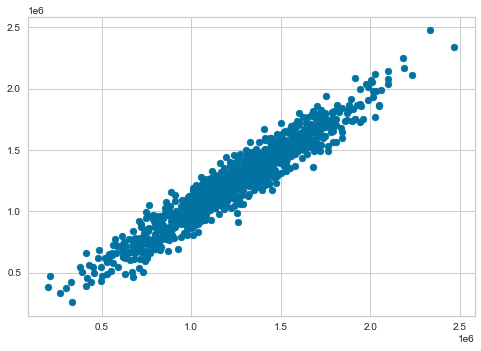

In [44]:
plt.scatter(y_test,predictions)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


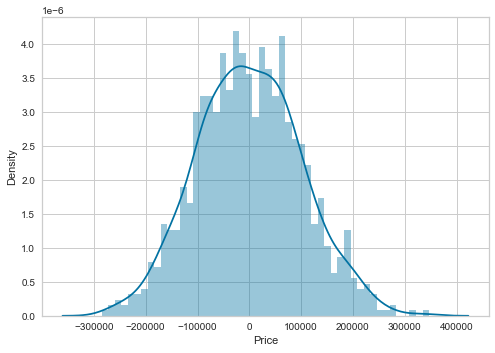

In [45]:
sns.distplot((y_test-predictions),bins=50);                 # residual histogram.

### Evaluation Metrics

                     case 1 : actual values = [2,4,6,8]      , predicted values = [4,6,8,10]
                     case 2 : actual values = [2,4,6,8]      , predicted values = [4,6,8,12]

                    MAE for case1 = 2.0                               rmse for case1 = 2
                    MAE for case2 = 2.5                               rmse for case2 = 2.65

In [46]:
## rmse büyük hataları daha çok cezalandırıyor.

In [47]:
from sklearn import metrics

In [48]:
print("MAE",metrics.mean_absolute_error(y_test,predictions))

MAE 80879.09723488614


In [49]:
print("MSE",metrics.mean_squared_error(y_test,predictions))

MSE 10089009300.892897


In [50]:
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

RMSE 100444.06055557937


In [51]:
## bunlar 0'dan çok uzak nedeni verimiz sentetik olduğundan tutarlı değil.

In [52]:
## gerçek verilerle uğraşıyorsak genelde rmse kullanılıyor genelde .

### ex-2

In [53]:
## seaborn'daki gibi skitlearn'de de çalışma df'leri var : 

In [54]:
from sklearn import datasets

In [55]:
datasets.load_diabetes()

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [56]:
datasets.load_diabetes().data.shape

(442, 10)

In [57]:
# df = pd.DataFrame(datasets.load_diabetes())  # böyle yaparsak olmaz***

In [58]:
X = datasets.load_diabetes().data

In [59]:
y = datasets.load_diabetes().target

In [60]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [61]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [62]:
## hazır bir veri seti olduğundan bu şekilde kullanmaya izin veriyor.

In [63]:
datasets.load_diabetes().feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [64]:
X = pd.DataFrame(datasets.load_diabetes()["data"],columns=datasets.load_diabetes()["feature_names"])

In [65]:
X           # ----> BÖYLE bir çevirme yapabiliriz.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [66]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [67]:
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078
66,-0.009147,0.050680,-0.018062,-0.033213,-0.020832,0.012152,-0.072854,0.071210,0.000272,0.019633
137,0.005383,-0.044642,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504
245,-0.027310,-0.044642,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483
31,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499
...,...,...,...,...,...,...,...,...,...,...
106,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059471,-0.083920
270,0.005383,0.050680,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008641,0.015491
348,0.030811,-0.044642,-0.020218,-0.005670,-0.004321,-0.029497,0.078093,-0.039493,-0.010903,-0.001078
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357


In [68]:
 y_train

array([144., 150., 280., 125.,  59.,  65., 281., 277., 167.,  90.,  72.,
       178.,  88., 270., 101., 197.,  97.,  53.,  71., 262.,  52., 102.,
       166., 189., 173., 220., 206.,  97.,  60.,  61., 242., 121., 128.,
       104., 265., 132., 283., 174., 129., 257., 137.,  63.,  93., 232.,
       208., 261., 179., 258., 262.,  51., 237.,  71., 139., 268.,  69.,
       317., 249., 154., 192., 116.,  81., 122., 259., 191., 292.,  55.,
       107., 210.,  91., 253.,  85., 252.,  59.,  78., 200.,  78., 245.,
       175.,  42., 127.,  53.,  94., 104., 199., 265., 281., 248., 257.,
       215., 303., 170.,  59., 277., 209., 138., 198., 124.,  96., 288.,
       225., 265., 101.,  55., 198.,  51., 252.,  64., 220., 131., 212.,
       142., 103., 155., 121.,  86., 111.,  65., 131.,  51., 128., 141.,
        48., 109., 178.,  88.,  84., 216., 150.,  60.,  96., 190.,  74.,
       279., 182., 160., 245., 276., 174., 180., 150., 196., 138.,  97.,
       246., 321., 308., 109.,  69., 182., 258., 16

In [69]:
model = LinearRegression()

In [70]:
model.fit(X_train,y_train)

LinearRegression()

In [71]:
model.score(X_test,y_test) * 100

45.260276297191936

In [72]:
## score kötü geldi .

In [73]:
model.coef_

array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
       -931.48884588,  518.06227698,  163.41998299,  275.31790158,
        736.1988589 ,   48.67065743])

In [74]:
coeff_df = pd.DataFrame(data = model.coef_ ,index=X.columns,columns = ["Coefficient"])
coeff_df

,Coefficient
age,37.904021
sex,-241.964362
bmi,542.428759
bp,347.703844
s1,-931.488846
s2,518.062277
s3,163.419983
s4,275.317902
s5,736.198859
s6,48.670657


In [75]:
model.intercept_

151.34560453985995

In [76]:
predictions = model.predict(X_test)

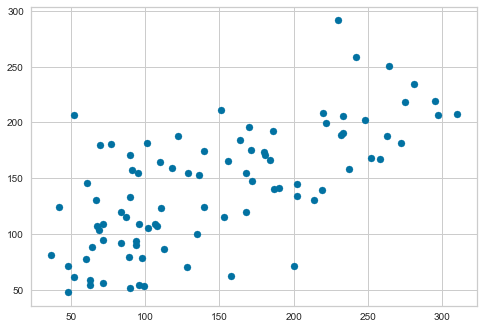

In [77]:
plt.scatter(y_test,predictions)          ## skorun kötü olduğunu buradan da görebiliriz.

In [78]:
metrics.mean_absolute_error(y_test,predictions)

42.79409467959994

In [79]:
metrics.mean_squared_error(y_test,predictions)

2900.193628493482

In [80]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

53.85344583676593

### ex-3:

In [81]:
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [83]:
df.name.nunique()

305

In [84]:
df.drop("name",axis=1,inplace=True)

In [85]:
df.isnull().sum().any()

True

In [86]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [87]:
df.dropna(inplace=True)        # konumuz şimdi lineer regres.

In [88]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [89]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [90]:
df["model_year"] +1900

0      1970
1      1970
2      1970
3      1970
4      1970
       ... 
393    1982
394    1982
395    1982
396    1982
397    1982
Name: model_year, Length: 392, dtype: int64

In [91]:
df["age"] = 2020 - (df["model_year"] +1900)

In [92]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,age
0,18.0,8,307.0,130.0,3504,12.0,70,usa,50
1,15.0,8,350.0,165.0,3693,11.5,70,usa,50
2,18.0,8,318.0,150.0,3436,11.0,70,usa,50
3,16.0,8,304.0,150.0,3433,12.0,70,usa,50
4,17.0,8,302.0,140.0,3449,10.5,70,usa,50


In [93]:
df.drop("model_year",axis=1,inplace=True)

In [94]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,age
0,18.0,8,307.0,130.0,3504,12.0,usa,50
1,15.0,8,350.0,165.0,3693,11.5,usa,50
2,18.0,8,318.0,150.0,3436,11.0,usa,50
3,16.0,8,304.0,150.0,3433,12.0,usa,50
4,17.0,8,302.0,140.0,3449,10.5,usa,50


In [95]:
df = pd.get_dummies(df,drop_first=True)

In [96]:
df.sample(8)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age,origin_japan,origin_usa
227,19.0,6,225.0,100.0,3630,17.7,43,0,1
189,15.5,8,304.0,120.0,3962,13.9,44,0,1
180,25.0,4,121.0,115.0,2671,13.5,45,0,0
10,15.0,8,383.0,170.0,3563,10.0,50,0,1
158,16.0,8,318.0,150.0,4498,14.5,45,0,1
325,44.3,4,90.0,48.0,2085,21.7,40,0,0
264,18.1,8,302.0,139.0,3205,11.2,42,0,1
279,29.5,4,98.0,68.0,2135,16.6,42,1,0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   age           392 non-null    int64  
 7   origin_japan  392 non-null    uint8  
 8   origin_usa    392 non-null    uint8  
dtypes: float64(4), int64(3), uint8(2)
memory usage: 25.3 KB


In [98]:
df.shape

(392, 9)

In [99]:
X = df.drop("mpg",axis=1)
y = df["mpg"]

In [100]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2,random_state=42)   

In [101]:
def eval_metrics(actual,pred):
    mae = metrics.mean_absolute_error(actual,pred)
    mse = metrics.mean_squared_error(actual,pred)
    rmse = np.sqrt(metrics.mean_squared_error(actual,pred))
    score = metrics.r2_score(actual,pred)
    return print("r2_score:",score, "\n","mae:",mae,"\n","mse:",mse,"\n","rmse",rmse)

In [102]:
model = LinearRegression()

In [103]:
model.fit(X_train,y_train)

LinearRegression()

In [104]:
model.intercept_

79.20294463155584

In [105]:
model.coef_

array([-0.34210131,  0.01920596, -0.0216204 , -0.00642267,  0.04219811,
       -0.79716146,  0.33046978, -2.87549946])

In [106]:
coeff_parameter = pd.DataFrame(data = model.coef_ , index = X.columns , columns=["Coefficient"])
coeff_parameter

,Coefficient
cylinders,-0.342101
displacement,0.019206
horsepower,-0.021620
weight,-0.006423
acceleration,0.042198
age,-0.797161
origin_japan,0.330470
origin_usa,-2.875499


In [108]:
y_pred = model.predict(X_test)

In [109]:
y_pred

array([26.62308629, 26.90246949, 34.26598184, 24.44117617, 28.23541424,
       30.1825394 ,  8.56100481, 30.34916333, 20.38153598, 29.44628713,
       12.74639826, 24.90246444, 16.90383129, 29.26573592, 22.69002521,
       29.01139375, 20.1273859 , 33.14407006, 26.35414107, 30.96911914,
       18.62424125, 35.63889895, 35.27942909, 14.81946638, 29.28017777,
       26.41101276, 21.6842468 , 15.83161913, 29.59833633, 24.88379141,
       13.37959723, 23.41302619, 20.81168747, 31.62899703, 12.3989298 ,
       36.04242383, 10.58135858, 23.90100171, 11.19643551,  6.94845354,
       12.68311718, 28.38719238, 35.88785647, 27.18142137, 11.91912268,
        9.97909932, 17.40713084, 32.34687072, 24.02663951, 31.13303701,
       11.85297985, 26.04081368, 22.75426327, 35.0138902 , 28.42903068,
       17.61471732, 20.25432749, 22.65581157, 23.40456421, 25.50148875,
        8.66368711, 22.63841676, 25.63063799, 24.08991433, 29.67539514,
       29.69088567, 25.44467515, 30.32743592, 21.76693112, 10.23

In [103]:
y.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [104]:
eval_metrics(y_test,y_pred)

r2_score: 0.7922774714022586 
 mae: 2.4619996980661445 
 mse: 10.602279011688344 
 rmse 3.256114096847398


## mae ile rmse birbirine yakınsa modelimizin tahminleri tutarlı diyebiliriz. rmse ile mae arasında çok uçurum varsa modelin bazı tahminleri çok kötü yaptığına dair insight sağlar.

In [105]:
my_dict = {"actual":y_test,"pred":y_pred}
compare = pd.DataFrame(my_dict)
compare

,actual,pred
79,26.0,26.623086
276,21.6,26.902469
248,36.1,34.265982
56,26.0,24.441176
393,27.0,28.235414
...,...,...
366,17.6,24.115070
83,28.0,23.582147
115,15.0,14.042393
3,16.0,14.785450


In [2]:
#pip install yellowbrick --user

C:\Users\BİRKAN\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


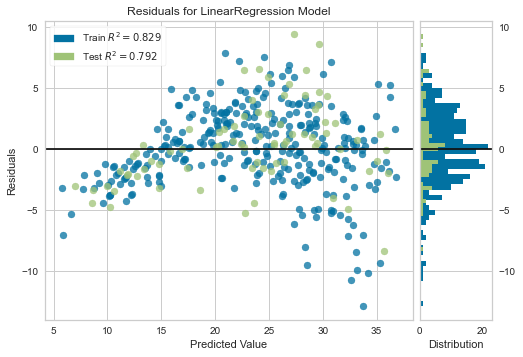

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [110]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

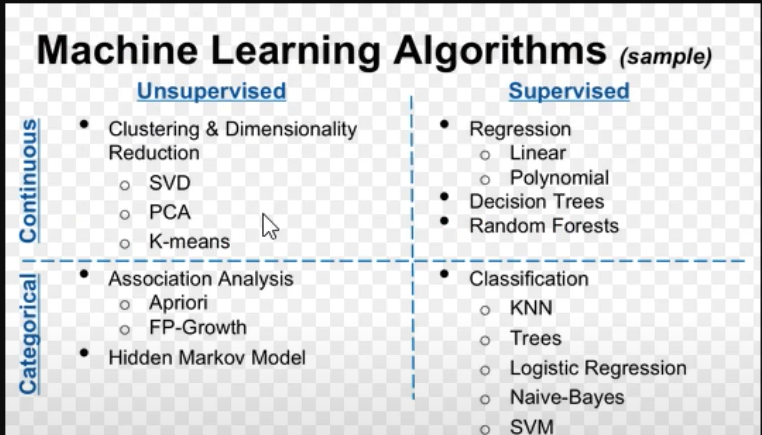